# NLP Capstone - Task 2: Exploratory Data Analysis (EDA)
Este notebook executa uma análise exploratória sobre um corpus textual amostrado, identificando a frequência de palavras, 2-grams e 3-grams. Também examina a cobertura de vocabulário e discute estratégias para compressão semântica e ampliação de cobertura.

In [1]:
import re
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk import ngrams

# Caminho do arquivo
file_path = "/Users/lpn/Downloads/final/en_US/en_US.twitter.txt"

# Carregamento amostrado
def sample_lines(file_path, sample_size=10000, prob=0.03):
    sampled = []
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            if len(sampled) >= sample_size:
                break
            if random.random() < prob:
                sampled.append(line.strip())
    return sampled

# Tokenização simples
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

In [2]:
# Amostragem
lines = sample_lines(file_path)

# Tokenização
tokens = []
for line in lines:
    tokens.extend(tokenize(line))

print(f"Total de palavras: {len(tokens)}")

Total de palavras: 131595


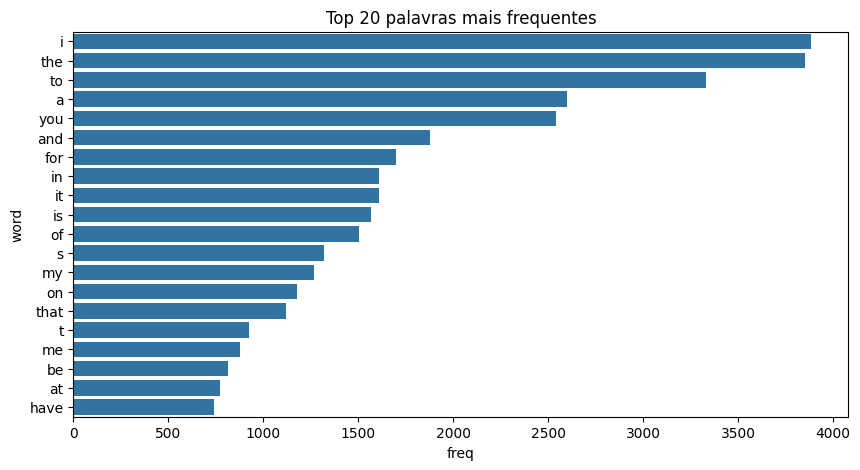

In [3]:
# Frequência de palavras
word_freq = Counter(tokens)
common_words = word_freq.most_common(20)
df_words = pd.DataFrame(common_words, columns=['word', 'freq'])

plt.figure(figsize=(10,5))
sns.barplot(x='freq', y='word', data=df_words)
plt.title('Top 20 palavras mais frequentes')
plt.show()

In [4]:
# Geração de n-grams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Frequência
bigram_freq = Counter(bigrams).most_common(10)
trigram_freq = Counter(trigrams).most_common(10)

print("Top 10 bigrams:")
for bg in bigram_freq: print(' '.join(bg[0]), "-", bg[1])

print("\nTop 10 trigrams:")
for tg in trigram_freq: print(' '.join(tg[0]), "-", tg[1])

Top 10 bigrams:
i m - 558
it s - 373
don t - 344
in the - 344
for the - 331
of the - 243
to be - 208
to the - 203
you re - 196
thanks for - 182

Top 10 trigrams:
i don t - 107
thanks for the - 102
i can t - 58
can t wait - 54
i m not - 45
looking forward to - 39
you don t - 38
don t know - 37
i didn t - 36
i ll be - 33


In [5]:
# Cobertura de vocabulário
total_words = sum(word_freq.values())
sorted_counts = sorted(word_freq.values(), reverse=True)
cumulative = 0
unique_words_50 = 0
unique_words_90 = 0

for i, freq in enumerate(sorted_counts):
    cumulative += freq
    if not unique_words_50 and cumulative >= 0.5 * total_words:
        unique_words_50 = i + 1
    if not unique_words_90 and cumulative >= 0.9 * total_words:
        unique_words_90 = i + 1
        break

print(f"Palavras únicas para cobrir 50%: {unique_words_50}")
print(f"Palavras únicas para cobrir 90%: {unique_words_90}")

Palavras únicas para cobrir 50%: 115
Palavras únicas para cobrir 90%: 4153


### Discussões e ideias:
- Palavras muito frequentes são geralmente stopwords (ex: 'the', 'and', 'you').
- A cobertura de vocabulário mostra que **poucas palavras** cobrem grande parte do uso.
- Pode-se aumentar a cobertura com:
  - Lematização e stemming
  - Inclusão de dicionários externos (ex: WordNet)
  - Expansão com embeddings ou subword models
- Palavras estrangeiras podem ser detectadas com bibliotecas como `langdetect` ou listas conhecidas.
